# Analysis of an experiment demo

In [3]:
from midastouch.analyzer import Analyzer
import os

Choose an experiment that we want to analyze and load the data:

In [5]:
dir = os.getcwd()
a = Analyzer(datadir=dir+'/experiment_2021-12-17_19_26_57.csv',
            paramdir=dir+'/params_2021-12-17_19_26_57.py')
a.load_data()

The parameters of the algorihtm can be retrieved by the following command:

In [6]:
a.get_parameters()

{'before_after_weights': {'before': 4, 'same time': 1, 'after': 0.5},
 'decay': 'exponential',
 'max_dist': 3,
 'n_investments': 10,
 'cvg_thresh': 0.001}

The following function gives back the top ranked investors. The rank is supposed to represent how 'related' they are to brand-name investors (which have a score of 1 by definition).

In [7]:
a.investor_ranking(top_n=100)

,investor_name,score,distance,investments,neighbors
0,GV,1.000000,0,914,<generator object Runner.run.<locals>.<genexpr...
860,Felicis Ventures,1.000000,0,527,<generator object Runner.run.<locals>.<genexpr...
1650,CRV,1.000000,0,594,<generator object Runner.run.<locals>.<genexpr...
806,Sequoia Capital,1.000000,0,1601,<generator object Runner.run.<locals>.<genexpr...
2914,DCVC,1.000000,0,434,<generator object Runner.run.<locals>.<genexpr...
1536,Lightspeed Venture Partners,1.000000,0,1053,<generator object Runner.run.<locals>.<genexpr...
546,Mayfield Fund,1.000000,0,607,<generator object Runner.run.<locals>.<genexpr...
45,Accel,1.000000,0,1717,<generator object Runner.run.<locals>.<genexpr...
836,Battery Ventures,1.000000,0,778,<generator object Runner.run.<locals>.<genexpr...
530,Intel Capital,1.000000,0,1488,<generator object Runner.run.<locals>.<genexpr...


We can also look at how many investors there are between in any range of scores:

In [8]:
bottom_score = 0.3
top_score = 0.4
print(f'There are {a.investor_count(bottom_score=0.3,top_score=0.4)} investors with score between {bottom_score} and {top_score}')

There are 640 investors with score between 0.3 and 0.4


and plot it on a bar chart.

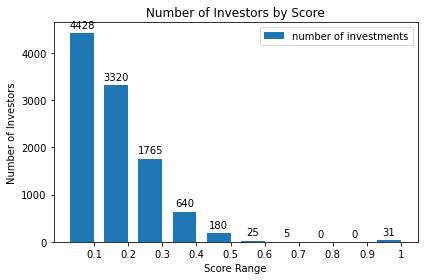

In [9]:
a.investor_count_chart()

Looking at the ranking of a sample of well-known investors is a gut-check of our ranking algorithm. 

In [10]:
a.investor_sample()

,investor_name,score,distance,investments,neighbors
255,Bill Gates,0.378104,1,68,<generator object Runner.run.<locals>.<genexpr...
5243,Ridge Ventures,0.341498,1,169,<generator object Runner.run.<locals>.<genexpr...
3962,Peter Thiel,0.316442,1,87,<generator object Runner.run.<locals>.<genexpr...
477,Y Combinator,0.295502,1,4189,<generator object Runner.run.<locals>.<genexpr...
6698,Redpoint eventures,0.285649,1,94,<generator object Runner.run.<locals>.<genexpr...
1921,M12 - Microsoft's Venture Fund,0.280909,1,227,<generator object Runner.run.<locals>.<genexpr...
922,WestWave Capital,0.244900,1,62,<generator object Runner.run.<locals>.<genexpr...
1892,Earlybird Venture Capital,0.197568,1,271,<generator object Runner.run.<locals>.<genexpr...
383,500 Startups,0.180419,1,2684,<generator object Runner.run.<locals>.<genexpr...
1808,Commerce Ventures,0.180066,1,131,<generator object Runner.run.<locals>.<genexpr...


If one wants to do a further analysis then they can do so by analyzing the full dataset and the full graph of connections which can be obtained by the following commands.

In [11]:
df = a.get_data()

## Choosing a different experiment file

Note, to choose a different experiment, just change the timestamp manually in the second cell. Alternatively, run the following code to choose the file paths

### If you want to choose a different experiment .csv file run the following code

In [7]:
try:
    from tkinter import Tk
    from tkFileDialog import askopenfilenames
except:
    from tkinter import Tk
    from tkinter import filedialog

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenames = filedialog.askopenfilenames() # show an "Open" dialog box and return the path to the selected file

datadir = filenames[0]

### If you want to choose a different params .py file run the following code

In [8]:
try:
    from tkinter import Tk
    from tkFileDialog import askopenfilenames
except:
    from tkinter import Tk
    from tkinter import filedialog

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenames = filedialog.askopenfilenames() # show an "Open" dialog box and return the path to the selected file

paramdir = filenames[0]

In [9]:
a = Analyzer(datadir=datadir, paramdir=paramdir)
a.load_data()

In [10]:
a.get_parameters()

{'before_after_weights': {'before': 1, 'same time': 1, 'after': 1},
 'decay': 'linear',
 'max_dist': 3,
 'n_investments': 30,
 'cvg_thresh': 0.001}

In [11]:
a.investor_ranking(top_n=100)

,investor_name,score,distance,investments,neighbors
0,GV,1.000000,0,914,"{'NFX': 6, 'REV': 14, 'Google': 15, 'ZhenFund'..."
570,General Catalyst,1.000000,0,994,"{'Accel': 198, 'WndrCo': 7, 'Crowdcube': 22, '..."
564,Felicis Ventures,1.000000,0,527,"{'Sapphire': 33, 'Skip Capital': 25, 'Index Ve..."
702,Foundation Capital,1.000000,0,648,"{'DHVC': 23, 'ZhenFund': 2, 'GGV Capital': 25,..."
549,Battery Ventures,1.000000,0,778,"{'ESO Fund': 17, 'PremjiInvest': 6, 'Icon Vent..."
729,Andreessen Horowitz,1.000000,0,1110,"{'Accel': 140, 'Goldman Sachs': 39, 'Index Ven..."
740,First Round Capital,1.000000,0,821,"{'GV': 149, 'TPG Biotech': 20, 'Foresite Capit..."
528,Sequoia Capital,1.000000,0,1601,"{'Alumni Ventures': 13, 'Tenaya Capital': 140,..."
830,Union Square Ventures,1.000000,0,363,"{'SV Angel': 145, 'Lux Capital': 45, 'George B..."
510,Kleiner Perkins,1.000000,0,1310,"{'TCV': 35, 'Accel': 134, 'Focus Ventures': 69..."
